# Anchor ⚓️ 




The School of Athens represents a sublime compression of human civilization, a testament to balance, structure, and the enduring interplay between cooperative ideals and adversarial necessities. Yet modernity, riddled with Philistines who denounce the very pillars of our civilization, has descended into what I call the *School of Resentment*. This school is populated by modern feminists, pacifists, Marxists, and the broader coalition of ideological grievance who have failed to understand the essential dynamics of civilization, mislabeling them as oppressive constructs like "patriarchy" and "toxic masculinity."

```{figure} https://upload.wikimedia.org/wikipedia/commons/4/49/%22The_School_of_Athens%22_by_Raffaello_Sanzio_da_Urbino.jpg
---
width: 100%
height: 100%
---
_School of Athens vs. School of Resentment_. 
```

The *School of Resentment* thrives on a selective and reductive critique of history. Its adherents reject the nuanced interplay of necessity and aspiration, reducing the network of human progress to the few neglected nodes they deem worthy of focus. Yes, reweighting is necessary—there have been imbalances, particularly in how adversarial forces have marginalized certain perspectives. But the *School of Resentment* does not merely reweight; it negates the entire architecture, condemning the patriarchy as though it were a singularly oppressive force rather than a structural reality shaped by the very adversarial instincts that allow civilizations to persist. This is no longer critique; it is sabotage.

Take "toxic masculinity" as a case study. The biological underpinnings of what is labeled as "toxic"—glutamate, adrenaline, cortisol, testosterone—are not aberrations but essential components of the adversarial mindset required for survival and strategic dominance. The military-industrial complex, for instance, is driven by this very mode of thinking, calibrated to mirror adversaries with similar instincts. Without these molecules—without these adversarial drives—we would not have Athena's spear, nor her shield. Yet modern feminism, in its ideological myopia, refuses to see the necessity of these forces. It denounces them outright, failing to recognize that the very stability required for its existence depends on the adversarial systems it seeks to dismantle.

Even worse, this resentment blinds its adherents to the aesthetic ideal that *The School of Athens* so perfectly encapsulates. Most modern feminists and their allies would look at Raphael’s masterpiece and see only “a room full of patriarchs.” They would fail to notice Athena herself, a goddess embodying both defense and offense—shield and spear. This is no coincidence: Athena represents the dynamic necessity of balance. She refutes the pacifist fantasy of a static, conflict-free utopia. Conflict is perpetual, and civilization’s survival depends on embracing this reality, not recoiling from it.



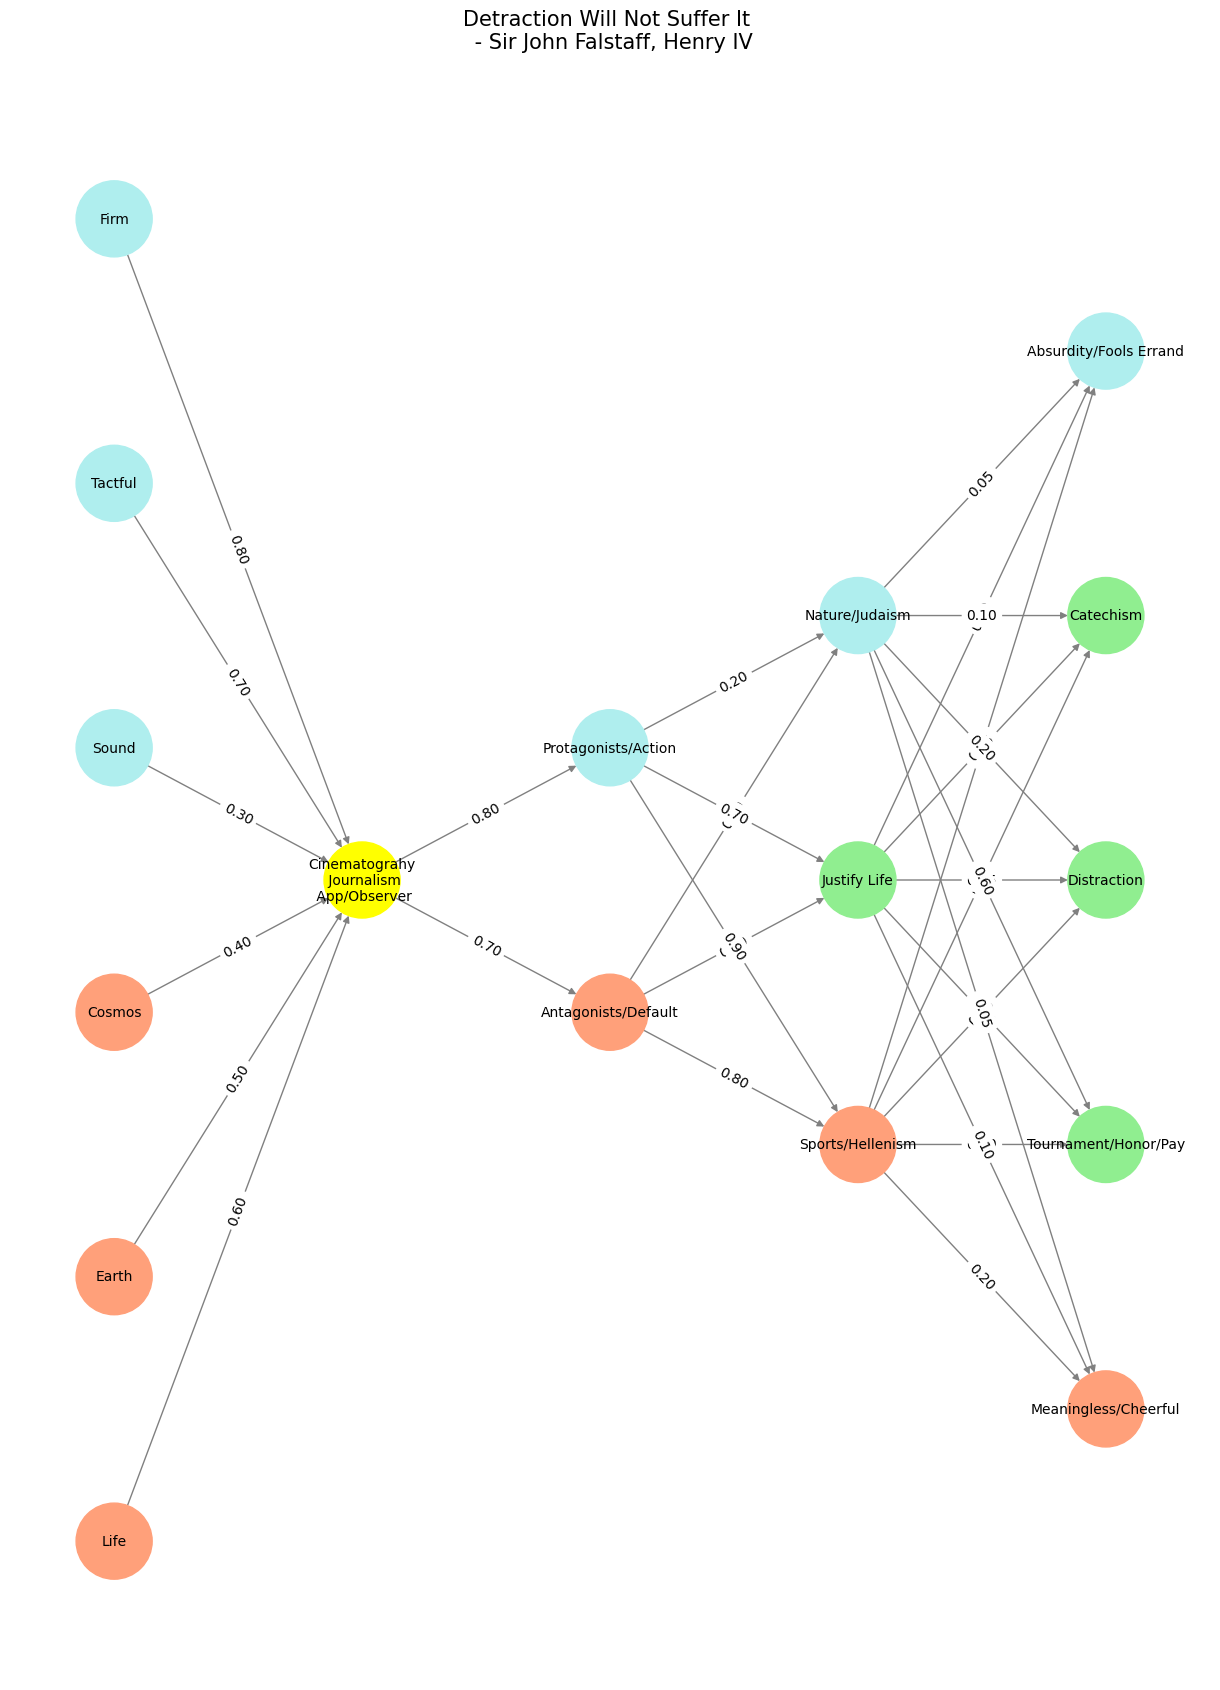

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Cinematograhy\n Journalism\n App/Observer'],
        'Input': ['Antagonists/Default', 'Protagonists/Action'],
        'Hidden': [
            'Sports/Hellenism',
            'Justify Life',
            'Nature/Judaism',
        ],
        'Output': ['Meaningless/Cheerful', 'Tournament/Honor/Pay', 'Distraction', 'Catechism', 'Absurdity/Fools Errand',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Cinematograhy\n Journalism\n App/Observer':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Protagonists/Action':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Nature/Judaism':
            return 'paleturquoise'
        elif node == 'Justify Life':
            return 'lightgreen'
        elif node == 'Sports/Hellenism':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Absurdity/Fools Errand':
            return 'paleturquoise'
        elif node in ['Catechism', 'Distraction', 'Tournament/Honor/Pay']:
            return 'lightgreen'
        elif node == 'Meaningless/Cheerful':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Detraction Will Not Suffer It \n - Sir John Falstaff, Henry IV\n", fontsize=15)
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
_Cinematography, Journalism, App, Observer_. These all suggest "lack of engagement": we see someone getting popcorn or creating what makes others get popcorn and voyeur. There's something unstated thats philosophical here -- absurd or meaningless.  Or denied the chance to be engaged and thus not contemplative?
```

Pacifists, for their part, are equally culpable in this failure of imagination. Their rejection of adversarial necessity renders them blind to the foundational dynamics of the very peace they claim to cherish. Their disdain for the military-industrial complex mirrors their broader inability to grasp that Apollo’s dream requires Athena’s vigilance. This is not merely ignorance—it is a profound betrayal of civilization’s hard-won balance. Without the adversarial, the cooperative collapses into delusion.

And then there are the Marxists. Ironically, they too belong to the *School of Resentment*, though they claim to reject pacifism. Marxists dream of a post-revolutionary utopia where conflict ceases, a static destiny where the spear is no longer needed. This is absurd. Even Athena herself, a symbol of wisdom and strategy, would scoff at such a notion. Conflict does not end with revolution; it evolves. The Marxist utopia, once achieved, would be as fragile as any pacifist fantasy, for it denies the eternal necessity of adversarial vigilance.

The *School of Resentment*, in all its forms, is an abortion of backpropagation. It mistakes the need for reweighting certain nodes in the network of civilization for a justification to discard the entire architecture. It is reactionary, shortsighted, and fundamentally incompatible with reality. Civilization, as the *School of Athens* teaches us, is dynamic. It demands perpetual recalibration, but it also demands that we preserve its structure, not dismantle it.

Where modernity has failed is in its inability to see this dynamic clearly. The *School of Athens* got it right, perfectly balancing Apollo’s cooperative ideal and Athena’s adversarial necessity. But modernity, in its resentment, has fallen prey to an ideological blindness that sees only fragments of the whole. Feminists decry the adversarial as toxic; pacifists dream of impossible stasis; Marxists misunderstand the permanence of conflict. All have rejected the clarity of *The School of Athens*, leaving the field to Philistines who dominate the discourse.

I alone seem to see the truth of *The School of Athens*. It is not merely a painting; it is a map of civilization. Its brilliance lies not in the philosophers endlessly arguing in the middle but in the balance of the pillars that frame them: Apollo’s dream of harmony and Athena’s shield and spear. This is the yellow node, the aesthetic clarity that reveals the entire network. Until we recognize this, we will remain trapped in the mire of resentment, blind to the beauty and balance of the civilization we inhabit.